In [1]:
# MODULES
%matplotlib inline
import numpy as np
from array import array
from numpy.lib import recfunctions as rfn
import matplotlib.pyplot as plt
import math
import os
import sys
# LOCAL MODULES
projDir = os.environ.get('PROJDIR_HVANA')
sys.path.insert(0, projDir)
import HvPackages.dtOperations as DTO
import HvPackages.querySQL as QSQL

In [3]:
# Take first file to generate nparray containing average zScore and standard deviation
inDir = projDir+'/Data_CorrelationTables/1m_1s/'

inPath = inDir+os.listdir(inDir)[0]
data = np.genfromtxt(inPath,delimiter=" ",names=True,dtype=None)
data = rfn.append_fields(data, names='RealID', data=range(0,len(data)), usemask=False) # Add a column with ID
aveData = np.zeros(len(data), dtype=[('RealID','<i8'),('Name','S60'),('zScore','f4'),('StDev1','f4'),('Correlation','f4'),('StDev2','f4')])
aveData['Name'] = data['Name']
aveData['RealID'] = data['RealID']


# Calculate the average zScore
numFiles = len(os.listdir(inDir))
for i,filename in enumerate(os.listdir(inDir)):
    inPath = inDir+filename
    eventTime = filename.replace('.dat','')
    data = np.genfromtxt(inPath,delimiter=" ",names=True,dtype=None)
    data = rfn.append_fields(data, names='AbsScore', data=np.absolute(data['zScore']), usemask=False) # Add absolute zScore column
    data = rfn.append_fields(data, names='AbsCorr', data=np.absolute(data['Correlation']), usemask=False) # Add absolute zScore column
    data = rfn.append_fields(data, names='RealID', data=range(0,len(data)), usemask=False) # Add a working ID
    data.sort(order='AbsCorr') # Sort according to larger absolute value
    data = data[::-1] # Invert the nparray (descending sorting order)
    
    for j in range(len(data)):
        k = data['RealID'][j]
        aveData['zScore'][k] += data['zScore'][j]
        aveData['Correlation'][k] += data['Correlation'][j]


for i in range(len(aveData)):
    aveData['zScore'][i] = aveData['zScore'][i]/float(numFiles)
    aveData['Correlation'][i] = aveData['Correlation'][i]/float(numFiles)



# Calculate the standard deviation
for i,filename in enumerate(os.listdir(inDir)):
    inPath = inDir+filename
    eventTime = filename.replace('.dat','')
    data = np.genfromtxt(inPath,delimiter=" ",names=True,dtype=None)
    data = rfn.append_fields(data, names='AbsScore', data=np.absolute(data['zScore']), usemask=False) # Add absolute zScore column
    data = rfn.append_fields(data, names='AbsCorr', data=np.absolute(data['Correlation']), usemask=False) # Add absolute zScore column
    data = rfn.append_fields(data, names='RealID', data=range(0,len(data)), usemask=False) # Add a working ID
    data.sort(order='AbsCorr') # Sort according to larger absolute value
    data = data[::-1] # Invert the nparray (descending sorting order)
    
    for j in range(len(data)):
        k = data['RealID'][j]
        aveData['StDev1'][k] += pow(aveData['zScore'][k] - data['zScore'][j],2)
        aveData['StDev2'][k] += pow(aveData['Correlation'][k] - data['Correlation'][j],2)


for i in range(len(aveData)):
    aveData['StDev1'][i] = math.sqrt(aveData['StDev1'][i]/float(numFiles))
    aveData['StDev2'][i] = math.sqrt(aveData['StDev2'][i]/float(numFiles))
    
aveData = rfn.append_fields(aveData, names='AbsScore', data=np.absolute(aveData['zScore']), usemask=False) # Add absolute zScore column
aveData = rfn.append_fields(aveData, names='AbsCorr', data=np.absolute(aveData['Correlation']), usemask=False) # Add absolute zScore column

/Library/Python/2.7/site-packages/ipykernel/__main__.py:49: RuntimeWarning: invalid value encountered in subtract


In [89]:
num = 10 # How many variables to display
avoid = 2 # Avoid the first "x" results

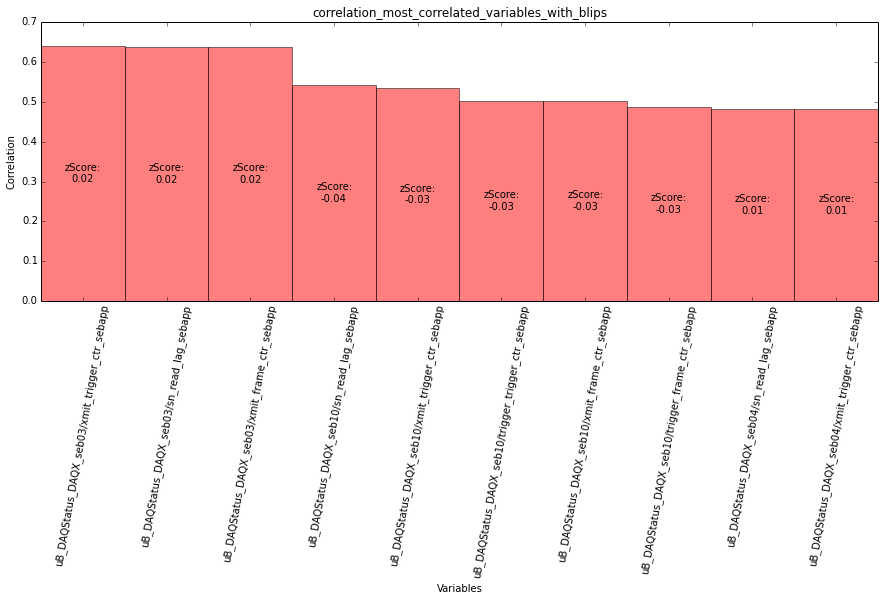

In [90]:
aveData.sort(order='AbsCorr') # Sort according to larger absolute value
aveData = aveData[::-1] # Invert the nparray (descending sorting order)

name = 'correlation_most_correlated_variables_with_blips'
negData = [[],[],[]]
posData = [[],[],[]]
varName = []
varPos = []

for i in range(avoid,num+avoid):
    if aveData['Correlation'][i] < 0:
        negData[0].append(i)
        negData[1].append(-1*aveData['Correlation'][i])
        negData[2].append(aveData['zScore'][i])
    if aveData['Correlation'][i] > 0:
        posData[0].append(i)
        posData[1].append(aveData['Correlation'][i])
        posData[2].append(aveData['zScore'][i])
    varName.append(aveData['Name'][i])
    varPos.append(i+0.5)

fig, ax = plt.subplots(figsize=(15,5), dpi=80)
plt.bar(posData[0],posData[1],1,color="green",alpha=0.5,label='Positive')
plt.bar(negData[0],negData[1],1,color="red",alpha=0.5,label='Negative')
plt.xticks(varPos,varName,rotation='80')
for x,y,probs in zip(posData[0],posData[1],posData[2]):
    plt.text(x+1/2., y/2., 'zScore:\n%.2f' %probs, ha='center', va= 'center')
for x,y,probs in zip(negData[0],negData[1],negData[2]):
    plt.text(x+1/2., y/2., 'zScore:\n%.2f' %probs, ha='center', va= 'center')
# plt.legend(loc='best', frameon=True)
plt.title(name)
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.savefig("Plots/"+name+".png")

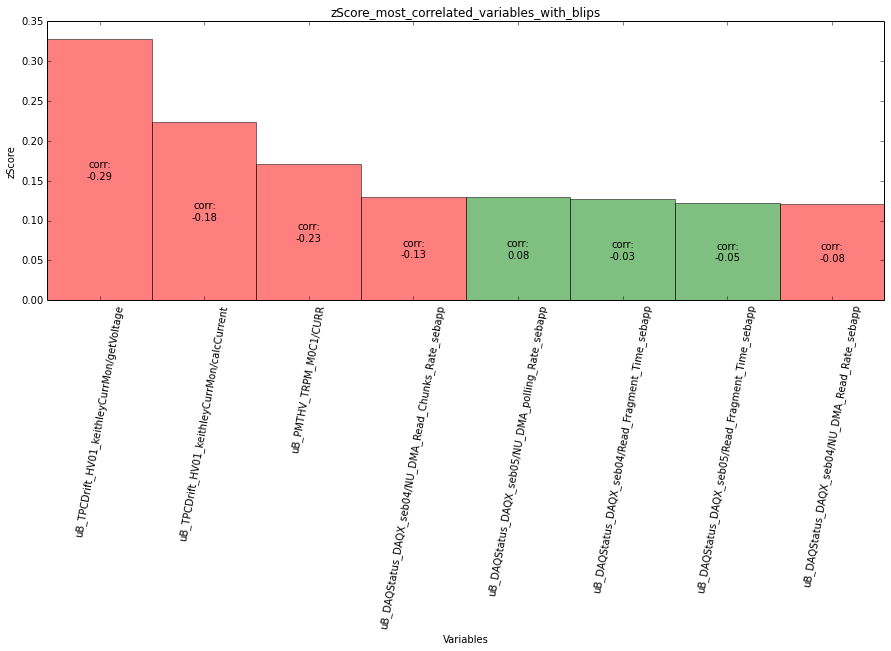

In [91]:
aveData.sort(order='AbsScore') # Sort according to larger absolute value
aveData = aveData[::-1] # Invert the nparray (descending sorting order)

name = 'zScore_most_correlated_variables_with_blips'
negData = [[],[],[]]
posData = [[],[],[]]
varName = []
varPos = []

for i in range(avoid,num):
    if aveData['zScore'][i] < 0:
        negData[0].append(i)
        negData[1].append(-1*aveData['zScore'][i])
        negData[2].append(aveData['Correlation'][i])
    if aveData['zScore'][i] > 0:
        posData[0].append(i)
        posData[1].append(aveData['zScore'][i])
        posData[2].append(aveData['Correlation'][i])
    varName.append(aveData['Name'][i])
    varPos.append(i+0.5)

fig, ax = plt.subplots(figsize=(15,5), dpi=80)
plt.bar(posData[0],posData[1],1,color="green",alpha=0.5,label='Positive')
plt.bar(negData[0],negData[1],1,color="red",alpha=0.5,label='Negative')
plt.xticks(varPos,varName,rotation='80')
for x,y,probs in zip(posData[0],posData[1],posData[2]):
    plt.text(x+1/2., y/2., 'corr:\n%.2f' %probs, ha='center', va= 'center')
for x,y,probs in zip(negData[0],negData[1],negData[2]):
    plt.text(x+1/2., y/2., 'corr:\n%.2f' %probs, ha='center', va= 'center')
# plt.legend(loc='best', frameon=True)
plt.title(name)
plt.xlabel('Variables')
plt.ylabel('zScore')
plt.savefig("Plots/"+name+".png")